# Word2Vec理论基础：词向量到Word2Vec与相关应用

## 目录：
- <a href='#common_tasks'>1. NLP常见任务</a>
- <a href='#methods'>2. NLP处理方法</a>
    - <a href='#encoding_similarity'>2.1 词编码需要保证词的相似性</a>
    - <a href='#vector'>2.2 简单 词/短语 翻译</a>
        - 向量空间分布的相似性
        - 向量空间子结构
        - 在计算机中表示一个词
- <a href='#distributed_representation'>3. 词编码：离散表示</a>
    - <a href='#one_hot'>离散表示：One-hot表示</a>
    - <a href='#bag_of_words'>离散表示：Bag of Words</a>
        - 文档的向量表示可以直接将各词的词向量表示加和
            - Bag Of Words 和 Set of words
            - Hash Trick 降维
        - 词权重（<a href='#tf_idf'>TF-IDF</a>, Binary weghting）
    - <a href='#n-gram'>离散表示：Bi-gram和N-gram</a>
        - 语言模型
    - <a href='#problems'>离散表示的问题</a>

- <a href='#dis_re'>4. 分布式表示(Distributed representation)</a>
    - <a href='#co_m'>4.1 共现矩阵(Cocurrence matrix)</a>
    - <a href='#dimen_reduc'>4.2 降维(Dimension Reduction)</a>
        - <a href='#svd'>SVD降维</a>
        - <a href='#nnlm'>NNLM(Neural Network Language model)</a>
        - <a href='#simple_w2v'>Word2Vec</a>
    

- <a href='#w2v'>5. Word2Vec</a>
- Word2Vec: CBOW(连续词袋)
- CBOW:层次Softmax
- CBOW:负例采样
- Word2Vec: Skip-Gram模型
- Word2Vec: 存在的问题

<h2><a name='common_tasks'>1.NLP常见任务</a></h2>
- 自动摘要：百度等搜索引擎，都会做**自动摘要**，获取关键字。
- 指代消解：“小明放学了，妈妈去接他”，这个“他”指的是谁。
- 机器翻译：小心地滑 ==> Slide carefully
- 词性标注：heat(v.) water(n.) in(p.) a(det.) pot(n.)
- 分词（中文，日文等）：大水沟/很/难/过
- 主题识别
- 文本分类：新闻内容自动分类

<h2><a name='methods'>2. NLP处理方法</a></h2>
- 传统：基于规则
    - 国内工业界大厂主要是有大的Dict，可用性很强。
- 现代：基于统计机器学习
    - HMM, CRF, SVM, LDA, CNN
    - “规则”隐含在模型参数里

<h3><a name='encoding_similarity'>2.1 词编码需要保证词的相似性</a></h3>
Nearest words to **frog**:
    1. frogs
    2. toad
    3. litoria
    4. leptodactylidae
    5. rana
    6. lizard
    7. eleutherodactylus

<img src='./images/wv01.png' width='50%'/>

<h3><a name='vector'>2.2 简单 词/短语 翻译</a></h3>
#### 向量空间分布的相似性：
<img src='./images/wv02.png' width='80%'/>

文明有不同的形态，但是不同的文明之间，都有相通点。  
比如：   
不同的语言的都有1-10的数字。参考上面图上，英文和西班牙语的1-10的数字表示的词在二维空间内应该在差不多的位置。

#### 向量空间子结构：
$$V_{King}-V_{Queen}+V_{Women}=V_{Man}$$
$$V_{Paris}-V_{France}+V_{German}=V_{Berlin}$$

“King的向量 减去 Queen的向量” 和“Man的向量 减去 Women的向量”的关系是几乎一样的。
更加充分地表达文本，文本之间的关系等。

**最终目标：词向量表示作为机器学习，特别是深度学习的输入和表示空间。**

#### 在计算机中表示一个词
<img src='./images/wv03.png' width='70%'/>

构建专家词典，**上位词**，**同义词**等。  
问题在于，专家词典是人做的，需要大量人力维护，主观的，不能分辨细节的差别，比方说：“美丽”和“漂亮”之间的相近程度，词意随着时代发生变化，无法发现新词。
这些的问题，主要在于专家的背景不一样，受主观的影响。

WordNet就是这样一个字典。  


<h2><a name='distributed_representation'>3.词编码：离散表示</a></h3>

**词袋模型(Bag of Words,简称BoW)。**   
词袋模型**假设我们不考虑文本中词与词之间的上下文关系，仅仅只考虑所有词的权重**。   
而权重与词在文本中出现的频率有关。  

词袋模型首先会进行分词，在分词之后，通过统计每个词在文本中出现的次数，我们就可以得到该文本基于词的特征，如果将各个文本样本的这些词与对应的词频放在一起，就是我们常说的向量化。向量化完毕后一般也会使用TF-IDF进行特征的权重修正，再将特征进行标准化。 再进行一些其他的特征工程后，就可以将数据带入机器学习算法进行分类聚类了。

总结下词袋模型的三部曲：**分词（tokenizing），统计修订词特征值（counting）与标准化（normalizing）。**

与词袋模型非常类似的一个模型是**词集模型(Set of Words,简称SoW)**，和词袋模型唯一的不同是它**仅仅考虑词是否在文本中出现，而不考虑词频**。也就是一个词在文本在文本中出现1次和多次特征处理是一样的。在大多数时候，我们使用词袋模型，后面的讨论也是以词袋模型为主。

当然，词袋模型有很大的局限性，因为它仅仅考虑了词频，没有考虑上下文的关系，因此会丢失一部分文本的语义。但是大多数时候，如果我们的目的是分类聚类，则词袋模型表现的很好。

<h4><a name='one_hot'>离散表示：One-hot 表示</a></h4>
语料库：   
John likes to watch movies. Mary likes too.    
John also likes to watch football games.

词典：   
{'John':1, 'likes':2, 'to':3, 'watch':4, 'movies':5, 'also':6, 'football':7, 'games':8, 'Mary':9, 'too':10}  

One-hot表示：  
John: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
likes: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
...
too : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- 词典包含10个单词，每个单词有唯一索引
- 在词典中的顺序和在句子中的顺序没有关联

<h4><a name='bag_of_words'>离散表示：Bag of Words</a></h4>
- 文档（句子）的向量表示可以直接将各词的词向量表示加和

<img src='./images/wv04.png' width='70%'/>

- 词权重：词在文档中的顺序没有被考虑
    - TF-IDF(Term Frequency - Inverse Document Frequency) 
        信息检索的词t的IDF weight $\log(1+\frac{N}{n_t})$，N: 文档总数，$n_t$：含有词t的文档数。
        <img src='./images/wv05.png' width='70%'/>
    - Binary weighting 短文本相似性，Bernoulli Naive Bayes
        <img src='./images/wv06.png' width='30%'/>
    

在词袋模型的统计词频这一步，我们会得到该文本中所有词的词频，有了词频，我们就可以用词向量表示这个文本。   
这里我们举一个例子，例子直接用scikit-learn的CountVectorizer类来完成，这个类可以帮我们完成文本的词频统计与向量化，代码如下：

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

corpus =["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 

print(vectorizer.fit_transform(corpus))

  (0, 16)	1
  (0, 3)	1
  (0, 15)	2
  (0, 4)	1
  (1, 5)	1
  (1, 9)	1
  (1, 2)	1
  (1, 6)	1
  (1, 14)	1
  (1, 3)	1
  (2, 1)	1
  (2, 0)	1
  (2, 12)	1
  (2, 7)	1
  (3, 10)	1
  (3, 8)	1
  (3, 11)	1
  (3, 18)	1
  (3, 17)	1
  (3, 13)	1
  (3, 5)	1
  (3, 6)	1
  (3, 15)	1


$$(文本的序号, 词的序号<Total>)\ \  词频$$  

我们看看对于上面4个文本的处理输出。

可以看出4个文本的词频已经统计出，在输出中，左边的括号中的第一个数字是**文本的序号**，第2个数字是**词的序号**，注意词的序号是基于所有的文档的。第三个数字就是我们的**词频**。


我们可以进一步看看每个文本的词向量特征和各个特征代表的词，代码如下：

In [6]:
vectorizer.fit_transform(corpus).toarray()

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]],
      dtype=int64)

In [4]:
vectorizer.get_feature_names()

['and',
 'apple',
 'car',
 'china',
 'come',
 'in',
 'is',
 'love',
 'papers',
 'polupar',
 'science',
 'some',
 'tea',
 'the',
 'this',
 'to',
 'travel',
 'work',
 'write']

可以看到我们一共有19个词，所以4个文本都是19维的特征向量。
而每一维的向量依次对应了下面的19个词。
另外由于词"I"在英文中是停用词，不参加词频的统计。

In [7]:
vectorizer.fit_transform(corpus).toarray().shape

(4, 19)

由于大部分的文本都只会使用词汇表中的很少一部分的词，因此我们的词向量中会有大量的0。也就是说词向量是**稀疏**的。在实际应用中一般使用**稀疏矩阵**来存储。


将文本做了**词频统计**后，我们一般会通过**TF-IDF**进行词特征值修订，这部分我们后面再讲。

向量化的方法很好用，也很直接，但是在有些场景下很难使用，比如分词后的词汇表非常大，达到100万+，此时如果我们直接使用向量化的方法，将对应的样本对应特征矩阵载入内存，有可能将内存撑爆，在这种情况下我们怎么办呢？
第一反应是我们要进行**特征的降维**，说的没错！而**Hash Trick**就是非常常用的文本特征降维方法。

在大规模的文本处理中，由于特征的维度对应分词词汇表的大小，所以维度可能非常恐怖，此时需要进行**降维**，不能直接用我们上一节的向量化方法。

而**最常用的文本降维方法是Hash Trick**。说到Hash，一点也不神秘，学过数据结构的同学都知道。这里的Hash意义也类似。

在Hash Trick里，我们会定义一个特征Hash后对应的哈希表的大小，这个哈希表的维度会远远小于我们的词汇表的特征维度，因此可以看成是降维。    

具体的方法是:
- 对应任意一个特征名，我们会用Hash函数找到对应哈希表的位置，
- 然后将该特征名对应的词频统计值累加到该哈希表位置。

如果用数学语言表示，假如哈希函数$h$使第$i$个特征哈希到位置$j$，即$h(i)=j$，则第$i$个原始特征的词频数值$\phi (i)$将累加到哈希后的第$j$个特征的词频数值$\overline \phi$上，即：

$$\overline \phi (j) = \sum_{i \in J; h(i)=j} \phi (i)$$
　其中$J$是原始特征的维度。

但是上面的方法有一个问题，有可能两个原始特征的哈希后位置在一起导致词频累加特征值突然变大，为了解决这个问题，出现了Hash Trick的变种**Signed Hash Trick**，此时除了哈希函数$h$，我们多了一个哈希函数：
$$ξ: N \to \pm 1$$

此时我们有
$$\overline \phi(j) = \sum_{i \in J;h(i)=j} ξ(i)\phi (i)$$

这样做的好处是，哈希后的特征仍然是一个无偏的估计，不会导致某些哈希位置的值过大。

当然，大家会有疑惑，**这种方法来处理特征，哈希后的特征是否能够很好的代表哈希前的特征呢？**

从实际应用中说，由于文本特征的高稀疏性，这么做是可行的。

在scikit-learn的HashingVectorizer类中，实现了基于signed hash trick的算法，这里我们就用HashingVectorizer来实践一下Hash Trick，为了简单，我们使用上面的19维词汇表，并哈希降维到6维。

当然在实际应用中，19维的数据根本不需要Hash Trick，这里只是做一个演示，代码如下：

In [9]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer2 = HashingVectorizer(n_features=6, norm=None)

print(vectorizer2.fit_transform(corpus))

  (0, 1)	2.0
  (0, 2)	-1.0
  (0, 4)	1.0
  (0, 5)	-1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (1, 2)	-1.0
  (1, 5)	-1.0
  (2, 0)	2.0
  (2, 5)	-2.0
  (3, 0)	0.0
  (3, 1)	4.0
  (3, 2)	-1.0
  (3, 3)	1.0
  (3, 5)	-1.0


大家可以看到结果里面有负数，这是因为我们的哈希函数ξ可以哈希到1或者-1导致的。

和PCA类似，Hash Trick降维后的特征我们已经不知道它代表的特征名字和意义。

此时我们不能像上一节向量化时候可以知道每一列的意义，所以Hash Trick的解释性不强。

一般来说，只要词汇表的特征不至于太大，大到内存不够用，肯定是使用一般意义的向量化比较好。因为向量化的方法解释性很强，我们知道每一维特征对应哪一个词，进而我们还可以使用TF-IDF对各个词特征的权重修改，进一步完善特征的表示。

而Hash Trick用大规模机器学习上，此时我们的词汇量极大，使用向量化方法内存不够用，而使用Hash Trick降维速度很快，降维后的特征仍然可以帮我们完成后续的分类和聚类工作。当然由于分布式计算框架的存在，其实一般我们不会出现内存不够的情况。因此，实际工作中我使用的都是特征向量化。



<strong><a name='tf_idf'>TF-IDF</a></strong>

在文本挖掘的预处理中，向量化之后一般都伴随着TF-IDF的处理，那么什么是TF-IDF，为什么一般我们要加这一步预处理呢？这里就对TF-IDF的原理做一个总结。

**文本向量化特征的不足：普遍词所占权重比例过大**

在将文本分词并向量化后，我们可以得到词汇表中每个词在各个文本中形成的词向量。

corpus=["I come to China to travel",   
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 
 
如果我们直接将统计词频后的N维特征做为文本分类的输入，会发现有一些问题。

比如第一个文本，我们发现"come","China"和“Travel”各出现1次，而“to“出现了两次。似乎看起来这个文本与”to“这个特征更关系紧密。但是实际上”to“是一个非常普遍的词，几乎所有的文本都会用到，因此虽然它的词频为2，但是重要性却比词频为1的"China"和“Travel”要低的多。如果我们的向量化特征仅仅用词频表示就无法反应这一点。因此我们需要进一步的预处理来反应文本的这个特征，而这个预处理就是TF-IDF。

**TF-IDF是Term Frequency -  Inverse Document Frequency的缩写，即“词频-逆文本频率”。它由两部分组成，TF和IDF。**

前面的TF也就是我们前面说到的词频，我们之前做的向量化也就是做了文本中各个词的出现频率统计，并作为文本特征，这个很好理解。关键是后面的这个IDF，即“逆文本频率”如何理解。在上一节中，我们讲到几乎所有文本都会出现的"to"其词频虽然高，但是重要性却应该比词频低的"China"和“Travel”要低。我们的**IDF就是来帮助我们来反应这个词的重要性的，进而修正仅仅用词频表示的词特征值。**

概括来讲，** IDF反应了一个词在所有文本中出现的频率，如果一个词在很多的文本中出现，那么它的IDF值应该低，比如上文中的“to”。** 而反过来如果一个词在比较少的文本中出现，那么它的IDF值应该高。比如一些专业的名词如“Machine Learning”。这样的词IDF值应该高。一个极端的情况，如果一个词在所有的文本中都出现，那么它的IDF值应该为0。

上面是从定性上说明的IDF的作用，那么如何对一个词的IDF进行定量分析呢？这里直接给出一个词x的IDF的基本公式如下：
$$IDF(t)= \log \frac{N}{N_t}$$

其中，$N$代表语料库中文本的总数，而$N(t)$代表语料库中包含词$t$的文本总数。为什么IDF的基本公式应该是是上面这样的而不是像$N/N(t)$这样的形式呢？这就涉及到信息论相关的一些知识了。感兴趣的朋友建议阅读吴军博士的《数学之美》第11章。

上面的IDF公式已经可以使用了，但是在一些特殊的情况会有一些小问题，比如某一个**生僻词在语料库中没有，这样我们的分母为0， IDF没有意义了。**

所以常用的IDF我们需要做一些**平滑**，使语料库中没有出现的词也可以得到一个合适的IDF值。平滑的方法有很多种，最常见的IDF平滑后的公式之一为：

$$IDF(t)= \log \frac{N+1}{N_t+1} +1$$

有了IDF的定义，我们就可以计算某一个词的TF-IDF值了：
$$TF-IDF(t) = TF(t) * IDF(t)$$
其中，$TF(T)$指词$t$在当前文本中的词频。

在scikit-learn中，有两种方法进行TF-IDF的预处理。

- 第一种方法是在用CountVectorizer类向量化之后再调用TfidfTransformer类进行预处理。
- 第二种方法是直接用TfidfVectorizer完成向量化与TF-IDF预处理。

首先我们来看第一种方法，CountVectorizer+TfidfTransformer的组合，代码如下：

In [1]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 

vectorizer = CountVectorizer()

transformer = TfidfTransformer()

tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
print(tfidf)

  (0, 4)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 3)	0.348842231691988
  (0, 16)	0.4424621378947393
  (1, 3)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 2)	0.45338639737285463
  (1, 9)	0.45338639737285463
  (1, 5)	0.3574550433419527
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 0)	0.5
  (2, 1)	0.5
  (3, 15)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 5)	0.2811316284405006
  (3, 13)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 10)	0.3565798233381452


现在我们用TfidfVectorizer一步到位，代码如下：

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer()

re = tfidf2.fit_transform(corpus)

print(re)

  (0, 4)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 3)	0.348842231691988
  (0, 16)	0.4424621378947393
  (1, 3)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 2)	0.45338639737285463
  (1, 9)	0.45338639737285463
  (1, 5)	0.3574550433419527
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 0)	0.5
  (2, 1)	0.5
  (3, 15)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 5)	0.2811316284405006
  (3, 13)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 10)	0.3565798233381452


输出的各个文本各个词的TF-IDF值和第一种的输出完全相同。大家可以自己去验证一下。

由于第二种方法比较的简洁，因此在实际应用中推荐使用，一步到位完成向量化，TF-IDF与标准化。

TF-IDF是非常常用的文本挖掘预处理基本步骤，但是如果预处理中使用了Hash Trick，则一般就无法使用TF-IDF了，因为Hash Trick后我们已经无法得到哈希后的各特征的IDF的值。 使用了TF-IDF并标准化以后，我们就可以使用各个文本的词特征向量作为文本的特征，进行分类或者聚类分析。

当然TF-IDF不光可以用于文本挖掘，在信息检索等很多领域都有使用。因此值得好好的理解这个方法的思想。

<h4><a name='n-gram'>离散表示：Bi-gram和N-gram</a></h4>
为2-gram建索引：  
    {"John likes”: 1,    
    "likes to”: 2,    
    "to watch”: 3,    
    "watch movies”: 4,    
    "Mary likes”: 5,    
    "likes too”: 6,    
    "John also”: 7,    
    "also likes”: 8,    
    “watch football”: 9,  
    "football games": 10}  
  
  <img src='./images/wv07.png' width='40%'/>
  
  - 优点：考虑了词的顺序
  - 缺点：词表的膨胀

一般在机器翻译的时候，会做到5元组（5-gram）。

这个量级是非常大的。

下面是常用字，在不同的N-gram下，模型参数的数量。

  <img src='./images/wv10.png' width='40%'/>

在机器翻译中，“我爱你”究竟是表达成“you love me”，“I love you”？

这个主要通过语言模型N-gram来解决，考虑语序的区别。

#### 语言模型
- 一句话（词组合）出现的概率
$$P(w_1,w_2,...,w_n) =\prod_{i=1}^m P(w_i|w_1,...,w_{i-1})$$

下面分别是Unigram和Bi-gram计算'Mary likes too'这个句子出现的概率。

Unigram是只考虑单个词，不依赖前面的词，是独立的；   
Bi-gram是只考虑前面一个词。

机器翻译中，语言模型的好坏，对于做出的结果影响非常大。   
在机器翻译中，从3-gram提升到5-gram，得到的语言模型，对结果的提升效果显著。

<img src='./images/wv08.png' width='70%'/>

实际在工业界处理时，并不会用概率连乘的方式去计算，主要原因在于：小的浮点数连乘，对性能的消耗和精度的问题。

解决方案是：  
对概率取log，相加。

<h4><a name='problems'>离散表示的问题</a></h4>
- 无法衡量词向量之间的关系：各种度量（与或非、距离）都不合适     
        酒店  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]   
        宾馆  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]   
        旅舍  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]  
    - 太稀疏，很难捕捉文本的含义
    
    
- 词表维度随着语料库增长膨胀
- n-gram词序列随语料库膨胀更快
- 数据稀疏问题：语料库中频次出现太低，需要各种平滑处理技术，防止出现0概率的问题。



---

<h2><a name='dis_re'>4.分布式表示(Distributed representation)</a></h2>
<img src='./images/wv09.png' width='70%'/>

**用一个词附近的其他词来表示该词**：   
"You shall know a word by the company it keeps." --J.R.Firth 1957:11

<img src='./images/wv11.png' width='90%'/>

通俗点的解释，在我们学习新的词语的时候，老师会让大家按词造句。在有足够的句子的情况下，上下文差不多的句子，该词在其中的语义也相似。

分布表示（distributional representation）：是基于**分布假设理论**，利用**共生矩阵**来获取词的语义表示，可以看成是一类获取词表示的方法。

什么是**分布假说**呢？   

词是承载语义的最基本的单元，而传统的独热表示（one-hot representation）仅仅将词符号化，不包含任何语义信息。**如何将语义融入到词表示中？**Harris 在 1954 年提出的分布假说（distributional hypothesis）为这一设想提供了理论基础：**上下文相似的词，其语义也相似**。

“这里的分布”与中文“统计分布”一词语义对应，描述的是**上下文的概率分布**。

用上下文描述语义的表示方法（或基于分布假说的方法）都可以称作分布表示，如潜在语义分析模型（Latent Semantic Analysis, LSA）、潜在狄利克雷分配模型（Latent Dirichlet Allocation，LDA）等。



分布式表示（distributed representation），描述的是把文本分散**嵌入**到另一个空间，一般从是**从高维空间嵌入到低维空间**。  

**“嵌入”**是几个意思？   
感觉跟塞入、挤入差不多呀。
还真是这样。如词的独热表示（one-hot representation），首先是高维的，且在高维向量中只有一个维度描述了词的语义。    
多高？   
词典有多大就有多少维，怎么也得万把维度吧。

**如何在低维空间表达一个词呢？**   
目前流行的是通过**矩阵降维**或**神经网络降维**将语义分散存储到向量的各个维度中，这两类方法得到的向量空间是低维的一般都可以称作分布式表示，又称为**词嵌入（word embedding）或词向量）**。

看吧，这就把词的表示从高维（5000-20000）嵌入到低维（50-300）。   
what？300维也叫低维？！是的，你没学过相对论?    

这里的分布式（distributed）是“分散”、“分配”的意思，与中文“分布式计算”一词语义对应，与之相对的是局部表示（local representation）。



词嵌入vs词向量？   
还是叫词嵌入好点。词向量容易绕人。从广义上讲，传统的词袋子模型也是用向量描述文本，也应当被称作词的向量表示，但是这种向量是高维稀疏的。
**在目前的NLP语境中，“词向量”特指由神经网络模型得到的低维实数向量表示。**

<h3><a name='co_m'>4.1 共现矩阵(Cocurrence matrix)</a></h3>

通俗地举例，想要知道一个人的收入水平，看他周边的朋友，就可以差不多估计其收入水平。  

局域窗的概率，在这个例子中，就是要找几个这个人周边的朋友。  

Word-Document 的共现矩阵主要用于**发现主题(topic)，用于主题模型**，如：
- LSA(Latent Semantic Analysis)

**局域窗** 中的 **Word-Word共现矩阵** 可以挖掘语法和语义信息。

例子：
>I like deep learning.  
I like NLP.   
I enjoy flying.  

这个例子中，window length设为1(一般设为5-10)。

使用对称的窗函数(左右window length都为1)。
"I like deep learning"中，"like"的左右的词分别是"I"和"deep"，这两个词和"like"共现了1次。

下面是上面例子中三句话，window length=1的情况下的**共现矩阵: Word-Word**：

<img src='./images/wv12.png' width='60%'/>

- 第一行第一列 (1,1)表示的是"I I"两个词的连接，三句话中出现过0次，所以(1,1)处为0;
- (1,2)  "I like" 出现2次
- (1,3)  "I enjoy" 出现1次
...


这个共现矩阵：Word-Word矩阵 是一个对称矩阵，行和列可以组合，列和行也可以组合，即："I like"可以组，"like I"也可以组，因为window看的是左右两侧的词。

在这个例子中，每一行已经能做表示了，比如说："I"经常和"like"和"enjoy"一起出现，而不是和其他的'I','deep',...等一起出现。'like'和'enjoy'很像，都会在'I'旁边出现，这样的发现，觉得'like'和'enjoy'这两个词好像接近一点。  

所以，每一行，或是每一列，纯天然就可以作为一个词向量 word vector，用周边的“朋友”（即：word)定义“你”。   
在此例中："I"的行里面"like","enjoy"和"I"比较接近，就把"like","enjoy"看作是一伙的，是相对比较接近的。

对称窗口只是为了保证，这个共现矩阵是一个 对称矩阵。

**共现矩阵**存在的问题：
- 将共现矩阵行（列）作为词向量
    - 向量维数随着字典大小线性增长
    - 存储整个词典的空间消耗非常大
    - 一些模型，如：文本分类模型会面临**稀疏性问题**
    - 模型会欠稳定

维度太高，太过稀疏，所以会通过**降维Dimension Reduction**的方法降低维度。



构造低维稠密向量作为词的分布式表示(25-1000维)

<h3><a name='dimen_reduc'>4.2 降维(Dimension Reduction)</a></h3>

共现矩阵的问题：维度太大，稀疏性，存储的消耗大，模型的不稳定性。  

为了解决这些问题，通过**降维**来解决。

<h4><a name='svd'>SVD降维</a></h4>

- 最直接的想法：用SVD对共现矩阵向量做降维

上面I like deep learning, I like NLP，I enjoy flying 语料对应的共现矩阵的SVD代码实例：

In [45]:
import numpy as np
la = np.linalg
words = ['I', 'like','enjoy','deep','learning','NLP','flying','.']

# 上面介绍共现矩阵word-word的例子中的共现矩阵，words对应的是行和列对应的words.
X = np.array([[0,2,1,0,0,0,0,0],
             [2,0,0,1,0,1,0,0],
             [1,0,0,0,0,0,1,0],
             [0,1,0,0,1,0,0,0],
             [0,0,0,1,0,0,0,1],
             [0,1,0,0,0,0,0,1],
             [0,0,1,0,0,0,0,1],
             [0,0,0,0,1,1,1,0]])

U, s, Vh = la.svd(X, full_matrices=False)

In [49]:
U

array([[-5.24124930e-01, -5.72859145e-01,  9.54463014e-02,
         3.83228493e-01, -1.76963375e-01, -1.76092183e-01,
        -4.19185600e-01, -5.57702732e-02],
       [-5.94438071e-01,  6.30120664e-01, -1.70207779e-01,
         3.10038363e-01,  1.84062339e-01, -2.34777849e-01,
         1.29535474e-01,  1.36813128e-01],
       [-2.56274005e-01,  2.74017533e-01,  1.59810848e-01,
         2.80462106e-16, -5.78984617e-01,  6.36550929e-01,
        -4.85726373e-16, -3.05414877e-01],
       [-2.85637408e-01, -2.47912130e-01,  3.54610324e-01,
        -7.31901294e-02,  4.45784489e-01,  8.36141432e-02,
         5.48721075e-01, -4.68012411e-01],
       [-1.93139313e-01,  3.38495048e-02, -5.00790405e-01,
        -4.28462480e-01,  3.47110226e-01,  1.55483227e-01,
        -4.68663749e-01, -4.03576557e-01],
       [-3.05134684e-01, -2.93988990e-01, -2.23433593e-01,
        -1.91614246e-01,  1.27460940e-01,  4.91219408e-01,
         2.09592800e-01,  6.57535375e-01],
       [-1.82489837e-01, -1.610277

<img src='./images/wv15.png' width='80%'/>

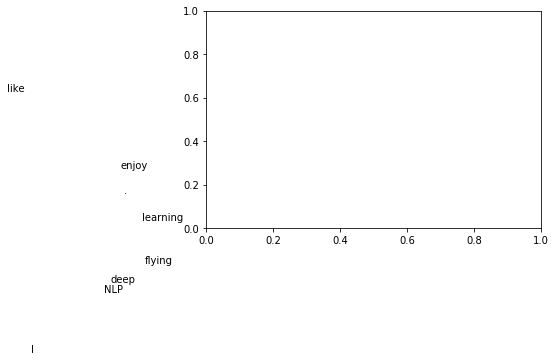

In [53]:
import matplotlib.pyplot as plt

plt.figure()

for i in range(len(words)):
    plt.text(U[i,0], U[i,1], words[i])
    
plt.show()

为了更好地理解，取了U矩阵里面的前两个

通过图，可以发现，3个句子就可以得到这样的向量和句子了。这么简单的几句话，就能发现"I"到"like"和"enjoy"之间的距离比较接近。



**SVD降维的问题：**
- 计算量随着语料库和词典增长膨胀太快，对$X(n,n)$维的矩阵，计算量为$O(n^3)$。  
而对大型的语料库，n大概为400k，语料库大小为1-60B token。
- 难以为词典中新加入的词分配词向量
- 与其他深度学习模型框架差异大

----

奇异值分解（Singular Value Decomposition, 简称SVD）是在机器学习领域广泛应用的算法。
- 可以用于降维算法中的特征分解
- 还可以用于推荐系统
- 自然语言处理等领域

SVD是很多机器学习算法的基石。

下面主要介绍SVD的原理，并讨论在PCA降维算法中是如何运用SVD的。

#### SVD原理：1.回顾特征值和特征向量

我们首先回顾下特征值和特征向量的定义如下：
$$Ax = \lambda x$$

其中$A$是一个n×n的矩阵，$x$是一个n维向量，则我们说$λ$是矩阵$A$的一个特征值，而$x$是矩阵$A$的特征值$λ$所对应的特征向量。

求出特征值$\lambda$和特征向量$x$有什么好处呢？ 

就是我们可以将矩阵A特征分解。如果我们求出了矩阵A的n个特征值$λ_1≤λ_2≤...≤λ_n$,以及这n个特征值所对应的特征向量$\{w_1,w_2,...,w_n\}$，，如果这n个特征向量线性无关，那么矩阵A就可以用下式的特征分解表示：
$$A=WΣW^{−1}$$

其中W是这n个特征向量所张成的n×n维矩阵，而Σ为这n个特征值为主对角线的n×n维矩阵。

一般我们会把W的这n个特征向量标准化，即满足$||w_i||_2=1$, 或者说$w^T_iw_i=1$，此时W的n个特征向量为标准正交基，满足$W^TW=I$，即$W^T=W^{−1}$, 也就是说W为酉矩阵。

这样我们的特征分解表达式可以写成
$$A=WΣW^T$$

注意到**要进行特征分解，矩阵A必须为方阵**。

那么**如果A不是方阵，即行和列不相同时，我们还可以对矩阵进行分解吗？**    
答案是可以，此时我们的**SVD**登场了。

#### SVD原理：2.SVD的定义

SVD也是对矩阵进行分解，但是和特征分解不同，**SVD并不要求要分解的矩阵为方阵**。

假设我们的矩阵A是一个m×n的矩阵，那么我们定义矩阵A的SVD为：
$$A=UΣV^T$$

其中，U是一个m×m的矩阵，Σ是一个m×n的矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为奇异值，V是一个n×n的矩阵。  
U和V都是酉矩阵，即满足$U^TU=I$,$V^TV=I$。

下图可以很形象的看出上面SVD的定义：
<img src='./images/wv13.png' width='70%'/>

那么我们如何求出SVD分解后的U,Σ,V这三个矩阵呢？

如果我们将A的转置和A做矩阵乘法，那么会得到n×n的一个方阵$A^TA$。既然$A^TA$是方阵，那么我们就可以进行特征分解，得到的特征值和特征向量满足下式：

$$(A^TA)v_i=λ_iv_i$$

这样我们就可以得到矩阵$A^TA$的n个特征值和对应的n个特征向量v了。将$A^TA$的所有特征向量张成一个n×n的矩阵V，就是我们SVD公式里面的V矩阵了。一般我们将V中的每个特征向量叫做A的右奇异向量。

如果我们将A和A的转置做矩阵乘法，那么会得到m×m的一个方阵$AA^T$。既然$AA^T$是方阵，那么我们就可以进行特征分解，得到的特征值和特征向量满足下式：

$(AA^T)u_i=λ_iu_i$

这样我们就可以得到矩阵$AA^T$的m个特征值和对应的m个特征向量u了。将$AA^T$的所有特征向量张成一个m×m的矩阵U，就是我们SVD公式里面的U矩阵了。一般我们将**U中的每个特征向量叫做A的左奇异向量**。

U和V我们都求出来了，现在就剩下奇异值矩阵Σ没有求出了。由于Σ除了对角线上是奇异值其他位置都是0，那我们只需要求出每个奇异值σ就可以了。

我们注意到:
$$A=UΣV^T⇒AV=UΣV^TV⇒AV=UΣ⇒Av_i=σ_iu_i⇒σ_i=Av_i/u_i$$

这样我们可以求出我们的每个奇异值，进而求出**奇异值矩阵Σ**。

上面还有一个问题没有讲，就是我们说$A^TA$的特征向量组成的就是我们SVD中的V矩阵，而$AA^T$的特征向量组成的就是我们SVD中的U矩阵，这有什么根据吗？这个其实很容易证明，我们以V矩阵的证明为例。

$$A=UΣV^T⇒A^T=VΣ^TU^T⇒A^TA=VΣ^TU^TUΣV^T=VΣ^2V^T$$

上式证明使用了:$U^TU=I,Σ^TΣ=Σ^2$。可以看出$A^TA$的特征向量组成的的确就是我们SVD中的V矩阵。类似的方法可以得到AAT的特征向量组成的就是我们SVD中的U矩阵。

进一步我们还可以看出我们的特征值矩阵等于奇异值矩阵的平方，也就是说特征值和奇异值满足如下关系：
$$σ_i=\sqrt{λ_i}$$
这样也就是说，我们可以不用$σ_i=Av_i/u_i$来计算奇异值，也可以通过求出$A^TA$的特征值取平方根来求奇异值。

#### SVD原理：3.SVD计算举例

这里我们用一个简单的例子来说明矩阵是如何进行奇异值分解的。我们的矩阵A定义为：

$$A = \begin{bmatrix}
0 & 1 \\
1 & 1 \\
1 & 0
\end{bmatrix}$$

首先求出$A^TA$和$AA^T$：

In [16]:
import numpy as np 

A = np.array([[0,1],[1,1],[1,0]])
print(A)

[[0 1]
 [1 1]
 [1 0]]


In [17]:
A_T = A.T
print(A_T)

[[0 1 1]
 [1 1 0]]


In [18]:
np.dot(A_T, A)

array([[2, 1],
       [1, 2]])

In [20]:
np.dot(A, A_T)

array([[1, 1, 0],
       [1, 2, 1],
       [0, 1, 1]])

进而求出$A^TA$的特征值和特征向量：

$$\lambda_1=3; u_1 =\begin{bmatrix}
\frac{1}{\sqrt{6}}\\
\frac{2}{\sqrt{6}}\\
\frac{1}{\sqrt{6}}\\
\end{bmatrix};
\lambda_2=1;
u_2 = \begin{bmatrix}
\frac{1}{\sqrt{2}}\\
0\\
-\frac{1}{\sqrt{2}}\\
\end{bmatrix};
\lambda_3=0;
u_3 = \begin{bmatrix}
\frac{1}{\sqrt{3}}\\
-\frac{1}{\sqrt{3}}\\
\frac{1}{\sqrt{3}}\\
\end{bmatrix};$$


利用$Av_i=\sigma_i u_i, i=1,2$$，求奇异值：

$$\begin{bmatrix}
0 & 1\\
1 & 1\\
1 & 0 
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix} = \sigma_1 
\begin{bmatrix}
\frac{1}{\sqrt{6}}\\
\frac{2}{\sqrt{6}}\\
\frac{1}{\sqrt{6}}\\
\end{bmatrix} 
=>
\sigma_1 = \sqrt{3}$$


$$\begin{bmatrix}
0 & 1\\
1 & 1\\
1 & 0 
\end{bmatrix}
\begin{bmatrix}
-\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix} = \sigma_2
\begin{bmatrix}
\frac{1}{\sqrt{2}}\\
0\\
-\frac{1}{\sqrt{2}}\\
\end{bmatrix} 
=>
\sigma_2= 1$$



当然，我们也可以用$σ_i=\sqrt{\lambda_i}$，直接求出奇异值为$\sqrt 3$和1.

 最终得到A的奇异值分解为：
 
 $$A=UΣV^T=\begin{bmatrix}
\frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
\frac{2}{\sqrt{6}} & 0 & -\frac{1}{\sqrt{3}} & \\
\frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} 
\end{bmatrix}
 \begin{bmatrix}
\sqrt{3} & 0\\
0 & 1\\
0 & 0 
\end{bmatrix}
 \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
-\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}$$


#### SVD原理：SVD的一些性质

上面几节我们对SVD的定义和计算做了详细的描述，似乎看不出我们费这么大的力气做SVD有什么好处。

那么SVD有什么重要的性质值得我们注意呢？

- 对于奇异值，它跟我们特征分解中的特征值类似，在奇异值矩阵中也是按照从大到小排列，而且奇异值的减少特别的快，在很多情况下，前10%甚至1%的奇异值的和就占了全部的奇异值之和的99%以上的比例。也就是说，我们也可以用最大的k个的奇异值和对应的左右奇异向量来近似描述矩阵。

也就是说：

$$A_{m×n}=U_{m×m}Σ_{m×n}V^T_{n×n}≈U_{m×k}Σ_{k×k}V^T_{k×n}$$

其中k要比n小很多，也就是一个大的矩阵A可以用三个小的矩阵$U_{m×k},Σ_{k×k},V^T_{k×n}$来表示。

如下图所示，现在我们的矩阵A只需要灰色的部分的三个小矩阵就可以近似描述了。

<img src='./images/wv14.png' width='80%'/>

由于这个重要的性质，
- SVD可以用于PCA降维，来做数据压缩和去噪。
- 也可以用于推荐算法，将用户和喜好对应的矩阵做特征分解，进而得到隐含的用户需求来做推荐。
- 同时也可以用于NLP中的算法，比如潜在语义索引（LSI）。

#### SVD原理：SVD用于PCA

下面我们就对SVD用于PCA降维做一个介绍。

在主成分分析（PCA）原理总结中，我们讲到要用PCA降维，需要找到样本协方差矩阵$X^TX$的最大的d个特征向量，然后用这最大的d个特征向量张成的矩阵来做低维投影降维。可以看出，在这个过程中需要先求出协方差矩阵$X^TX$，当样本数多样本特征数也多的时候，这个计算量是很大的。

注意到我们的SVD也可以得到协方差矩阵$X^TX$最大的d个特征向量张成的矩阵，但是SVD有个好处，有一些SVD的实现算法可以**不求先求出协方差矩阵$X^TX$，也能求出我们的右奇异矩阵V**。也就是说，我们的PCA算法可以不用做特征分解，而是做SVD来完成。这个方法在样本量很大的时候很有效。实际上，**scikit-learn的PCA算法的背后真正的实现就是用的SVD**，而不是我们我们认为的暴力特征分解。

另一方面，注意到PCA仅仅使用了我们SVD的右奇异矩阵，没有使用左奇异矩阵，那么左奇异矩阵有什么用呢？

假设我们的样本是m×n的矩阵X，如果我们通过SVD找到了矩阵$XX^T$最大的d个特征向量张成的m×d维矩阵U，则我们如果进行如下处理：
$$X′_{d×n}=U^T_{d×m}X_{m×n}$$

可以得到一个d×n的矩阵X‘,这个矩阵和我们原来的m×n维样本矩阵X相比，行数从m减到了k，可见对行数进行了压缩。也就是说，左奇异矩阵可以用于行数的压缩。相对的，右奇异矩阵可以用于列数即特征维度的压缩，也就是我们的PCA降维。　　　　



SVD作为一个很基本的算法，在很多机器学习算法中都有它的身影，特别是在现在的大数据时代，由于SVD可以实现并行化，因此更是大展身手。

SVD的原理不难，只要有基本的线性代数知识就可以理解，实现也很简单因此值得仔细的研究。

当然，**SVD的缺点是分解出的矩阵解释性往往不强，有点黑盒子的味道，不过这不影响它的使用。**



---

由于维度太高的问题，我们希望可以能够做word embedding，对大多数都是0的稀疏向量，做成稠密的低维向量。

SVD的降维和其他的深度学习的框架差异比较大。

<h3><a name='nnlm'>NNLM(Neural Network Language model)</a></h3>

当语言模型的规模到了5-gram五元时，会出现很大的稀疏性的问题，统计也不好统计，去做平滑，效果也不佳。
由于语料和语言模型的阶数，统计实在是耗时，还需要非常大的存储空间去存储这些概率。  

参数化的方式去构建语言模型，不用去记录所有的概率，而是用参数去计算。

- 直接从语言模型出发，将模型最优化过程转化为求词向量表示的过程。

$$ 目标函数 L(\theta) = \sum_{t} \log P(w_t|w_{t-n+1},w_{t-n+2},...,w_{t-1})$$

- 使用了非对称的前向窗函数，窗长度为n-1
- 滑动窗口遍历整个语料库求和，计算量正比于语料库大小
- 概率P满足归一化条件，这样不同位置t处的概率才能相加，即
$$\sum_{w \in \{ vocabulary\} }P(w_t|w_{t-n+1}, w_{t-n+2}, ...,w_{t-1}) = 1$$

用神经网络来实现概率P

Loss Function和Cost Function，都是用来评估得到的模型和理想的模型之间的差距的，越小越好。
Objective Function目标函数，越大越好。在NNLM中，上面这个目标函数$L(\theta)$其实就是求最大似然。

"我爱北京天安门"，这句话的目标函数就是求：
$$L(\theta) = \log P(我|<s>) + \log P(爱|我) +\log P(北京|我爱) + \log P(天安门|我爱北京)$$
使目标函数值最大，即"我爱北京天安门"这句话的最大似然概率最大。

注意，在NNLM中，是需要固定窗口大小的，上面这个“我爱北京天安门”的句子太短，不足以支撑固定4个窗口大小的长度，仅用于观看。

**NNLM:结构**

<img src='./images/wv16.png' width='80%'/>

上图讲的是NNLM模型的结构，这个模型严格上讲就是一个神经网络。

这个模型是由词向量生成的模型。

假设我们有一个语料库，我们从这个语料库当中，通过滑动窗口形式取出来若干个w，此处假设我们取了3个词$w_1,w_2,w_3$，然后去求$w_4$。（此处假设window=4)

目标：   
由$w_1,w_2,w_3$去预测$w_4$，这就是我们要做的事情，但是我们会做若干次，因为有很多的样本。

每个窗口都要做的是：在当前窗口内，通过前3个词去预测第4个词。


第一层：输入：  
输入是一个one-hot表示的向量，假定此处的词典是语料库中最常出现的10万个词，我们会去编码一个长度为10万的向量。    
$w_1,w_2,w_3$都是一个$1*10w$的向量，其中只有对应的词所在的位置上有1，其余都为0的向量。

第二层：Projection Layer投射层：   
要做的事是把一个个词表示成稠密向量。  
在深度学习中，惯用的手段是：初始化一个C矩阵，不断地优化参数即可。

$w_i$的是$1*10w$的向量。   
矩阵C是$300 * 10w$的矩阵，其中10w是词汇的one-hot的编码长度，300是目标想要获得的稠密向量的维度V。 
矩阵C是随机初始化的。

$$C_{300*10w} w^T_{10w * 1} = c_{300*1}$$


"我","爱","北京"三个300维向量，拼接concat得到一个900维，作为hidden Layer的输入；   
hidden layer的输出假设为500维；   
output 10w 的概率向量，希望"天安门"对应的概率值是最大的。

最后要得到的结果是10w个词表里面的哪一个词。

Softmax就是一个线性分类器。

Projection Layer中的矩阵C就是我们需要的权重。

Input Layer => Projection Layer => Hidden Layer => Output Layer

<img src='./images/wv17.png' width='80%'/>

**NNLM的计算复杂度**    
每个训练样本的计算复杂度：
$$N*D + N*D*H + H*V$$
一个简单模型在大数据量上的表现比复杂模型在少数据量上的表现会好。

<h4><a name='simple_w2v'>Word2Vec</a></h4>

虽然上面的NNLM效果还不错，但是它的计算量比较大，不是我们期待的方式。

我们期待有一种方式能够保持准确率，又能够在CPU上就能训练，降低训练的难度。

<img src='./images/wv18.png' width='90%'/>

<img src='./images/wv24.png' width='80%'/>

<h2><a name='w2v'>5. Word2Vec </a></h2>

word2vec是google在2013年推出的一个NLP工具，它的特点是将**所有的词向量化**，这样词与词之间就可以定量的去度量他们之间的关系，挖掘词之间的联系。

虽然源码是开源的，但是谷歌的代码库国内无法访问，因此本文的讲解word2vec原理以Github上的word2vec代码为准。本文关注于word2vec的基础知识。

<h3><a name='base'>词向量基础</a></h3>

用词向量来表示词并不是word2vec的首创，在很久之前就出现了。最早的词向量是很冗长的，它使用是词向量维度大小为整个词汇表的大小，对于每个具体的词汇表中的词，将对应的位置置为1。

比如我们有下面的5个词组成的词汇表，词"Queen"的序号为2， 那么它的词向量就是(0,1,0,0,0)。同样的道理，词"Woman"的词向量就是(0,0,0,1,0)。

这种词向量的编码方式我们一般叫做1-of-N representation或者one hot representation.

<img src='./images/wv19.png' width='40%'/>

One hot representation用来表示词向量非常简单，但是却有很多问题。

最大的问题是我们的词汇表一般都非常大，比如达到百万级别，这样每个词都用百万维的向量来表示简直是内存的灾难。


这样的向量其实除了一个位置是1，其余的位置全部都是0，表达的效率不高，能不能把词向量的维度变小呢？

**Dristributed representation可以解决One hot representation的问题，它的思路是通过训练，将每个词都映射到一个较短的词向量上来。**   
所有的这些词向量就构成了向量空间，进而可以用普通的统计学的方法来研究词与词之间的关系。

这个较短的词向量维度是多大呢？   
这个一般需要我们在训练时自己来指定。

比如下图我们将词汇表里的词用"Royalty","Masculinity", "Femininity"和"Age"4个维度来表示，King这个词对应的词向量可能是(0.99,0.99,0.05,0.7)。当然在实际情况中，我们并不能对词向量的每个维度做一个很好的解释。

<img src='./images/wv20.png' width='60%'/>

有了用Dristributed representation表示的较短的词向量，我们就可以较容易的分析词之间的关系了，比如我们将词的维度降维到2维，有一个有趣的研究表明，用下图的词向量表示我们的词时，我们可以发现：

<img src='./images/wv21.png' width='40%'/>
<img src='./images/wv22.png' width='40%'/>

可见我们只要得到了词汇表里所有词对应的词向量，那么我们就可以做很多有趣的事情了。

不过，怎么训练得到合适的词向量呢？   
一个很常见的方法是使用神经网络语言模型。

<h3><a name='cbow'>Word2Vec: CBOW(连续词袋)</a></h3>

在word2vec出现之前，已经有用神经网络DNN来用训练词向量进而处理词与词之间的关系了。

采用的方法一般是一个三层的神经网络结构（当然也可以多层），分为输入层，隐藏层和输出层(softmax层)。

**这个模型是如何定义数据的输入和输出呢？**   
一般分为CBOW(Continuous Bag-of-Words 与Skip-Gram两种模型。

CBOW模型的训练
- 输入：是某一个特征词的上下文相关的词对应的词向量，
- 输出：就是这特定的一个词的词向量。

比如下面这段话，我们的上下文大小取值window为4，特定的这个词是"Learning"，也就是我们需要的输出词向量,上下文对应的词有8个，前后各4个，这8个词是我们模型的输入。由于CBOW使用的是词袋模型，因此这8个词都是平等的，也就是不考虑他们和我们关注的词之间的距离大小，只要在我们上下文之内即可。

<img src='./images/wv23.png' width='70%'/>

- 输入：'an','efficient','method','for','high','quality','distributed','vector'这8个上下文对应的词是模型的输入，表示方式为one-hot。
- 输出：是所有词的softmax概率，此处期望'learning'的概率最大。

这样我们这个CBOW的例子里：
- 我们的输入是8个词向量，
- 输出是所有词的softmax概率（训练的目标是期望训练样本特定词对应的softmax概率最大），
- 对应的CBOW神经网络模型输入层有8个神经元，输出层有词汇表大小个神经元。

- 隐藏层的神经元个数我们可以自己指定。

通过DNN的反向传播算法，我们可以求出DNN模型的参数，同时得到所有的词对应的词向量。  

这样当我们有新的需求，要求出某8个词对应的最可能的输出中心词时，我们可以通过一次DNN前向传播算法并通过softmax激活函数找到概率最大的词对应的神经元即可。

<img src='./images/wv18.png' width='90%'/>
图上目标函数的推广，最上面应该是连乘符号。

上图显示了CBOW的特点：
- 无隐层：Input Layer => Projection Layer(sum) => Output
- 使用双向上下文窗口
- 上下文次序无关(BoW)
- **输入层直接使用低维稠密表示：$w_i$的向量随机初始化**
- 投影层简化为求和（平均）：和NNLM不同，在NNLM中是concat,300维会变成900维，cbow就是300维。

图上的SUM表示上下文的词的向量是通过相加的方式，而不是和NNLM中concat拼接的方式。

严格意义上，它只是一个Linear的分类器，从输入到Softmax概率输出，没有影藏层，投影层Projection Layer被简化了，**输入直接使用低维稠密表示（随机初始化）**。


<h3><a name='skipgram'>Word2Vec: Skipgram</a></h3>

Skip-Gram模型和CBOW的思路是反着来的，即**输入是特定的一个词的词向量，而输出是特定词对应的上下文词向量。**

还是上面的例子，我们的上下文大小取值为4， 特定的这个词"Learning"是我们的输入，而这8个上下文词是我们的输出。

这样我们这个Skip-Gram的例子里，我们的
- 输入是特定词，
- 输出是softmax概率排前8的8个词，
- 对应的Skip-Gram神经网络模型输入层有1个神经元，
- 输出层有词汇表大小个神经元。

- 隐藏层的神经元个数我们可以自己指定。

通过DNN的反向传播算法，我们可以求出DNN模型的参数，同时得到所有的词对应的词向量。

这样当我们有新的需求，要求出某1个词对应的最可能的8个上下文词时，我们可以通过一次DNN前向传播算法得到概率大小排前8的softmax概率对应的神经元所对应的词即可。

以上就是神经网络语言模型中如何用CBOW与Skip-Gram来训练模型与得到词向量的大概过程。

但是这和word2vec中用CBOW与Skip-Gram来训练模型与得到词向量的过程有很多的不同。

<img src='./images/wv24.png' width='80%'/>

上图显示了Skip-Gram的特点：
- 无隐层
- 投影层也可省略
- 每个词向量作为log-linear模型的输入

word2vec为什么 不用现成的DNN模型，要继续优化出新方法呢？

最主要的问题是DNN模型的这个处理过程非常耗时。我们的词汇表一般在百万级别以上，这意味着我们DNN的输出层需要进行softmax计算各个词的输出概率的的计算量很大。

有没有简化一点点的方法呢？

<h3><a href='#w2vproblems'>Word2Vec: 两种改进方法</a></h3>

我们讲到了使用神经网络的方法来得到词向量语言模型的原理和一些问题，现在我们开始关注word2vec的语言模型如何改进传统的神经网络的方法。

由于word2vec有两种改进方法，
- 一种是基于Hierarchical Softmax的，
- 另一种是基于Negative Sampling的。

<h4><a name='hierar'>基于Hierarchical Softmatx的Softmax模型</a></h4>

我们先回顾下传统的神经网络词向量语言模型，里面一般有三层:
- 输入层（词向量），
- 隐藏层
- 输出层（softmax层）。

里面最大的问题在于从隐藏层到输出的softmax层的计算量很大，因为要计算所有词的softmax概率，再去找概率最大的值。

这个模型如下图所示。其中V是词汇表的大小，

<img src='./images/wv26.png' width='70%'/>

word2vec对这个模型做了改进。
- 首先，对于从输入层到隐藏层的映射，没有采取神经网络的线性变换加激活函数的方法，而是采用简单的对所有输入词向量求和并取平均的方法。

    比如：   
    输入的是三个4维词向量：(1,2,3,4),(9,6,11,8),(5,10,7,12),那么我们word2vec映射后的词向量就是(5,6,7,8)。由于这里是从多个词向量变成了一个词向量。

- 第二个改进就是从隐藏层到输出的softmax层这里的计算量个改进。为了避免要计算所有词的softmax概率，word2vec采样了**霍夫曼树**来代替从隐藏层到输出softmax层的映射。


本文中有<a href='#huofuman'>霍夫曼树的原理</a>。  
如何映射呢？这里就是理解word2vec的关键所在了。

由于我们把之前所有都要计算的从输出softmax层的概率计算变成了一颗二叉霍夫曼树，那么我们的softmax概率计算只需要沿着树形结构进行就可以了。

如下图所示，我们可以沿着霍夫曼树从根节点一直走到我们的叶子节点的词$w_2$。
<img src='./images/wv27.png' width='50%'/>

和之前的神经网络语言模型相比，我们的霍夫曼树的所有内部节点就类似之前神经网络隐藏层的神经元。

其中，**根节点的词向量**对应我们的**投影后的词向量**，而**所有叶子节点**就类似于之前神经网络**softmax输出层的神经元**，**叶子节点的个数就是词汇表的大小**。

在霍夫曼树中，隐藏层到输出层的softmax映射不是一下子完成的，而是沿着霍夫曼树一步步完成的，因此这种softmax取名为"Hierarchical Softmax"。


如何“沿着霍夫曼树一步步完成”呢？

在word2vec中，我们采用了**二元逻辑回归**的方法，即规定沿着左子树走，那么就是负类(霍夫曼树编码1)，沿着右子树走，那么就是正类(霍夫曼树编码0)。

判别正类和负类的方法是使用sigmoid函数，即：
$$P(+) =\sigma(x_w^T \theta) =\frac{1}{1+e^{-x_w^T \theta}}$$

其中$x_w$是当前内部节点的词向量，而θ则是我们需要从训练样本求出的逻辑回归的模型参数。



使用霍夫曼树有什么好处呢？   

- 首先，由于是二叉树，之前计算量为V,现在变成了$\log_2 V$。   
- 第二，由于使用霍夫曼树是高频的词靠近树根，这样高频词需要更少的时间会被找到，这符合我们的贪心优化思想。   



容易理解，被划分为左子树而成为负类的概率为: 
$$P(−)=1−P(+)$$

在某一个内部节点，要判断是沿左子树还是右子树走的标准就是看P(−),P(+)谁的概率值大。而控制P(−),P(+)谁的概率值大的因素一个是当前节点的词向量，另一个是当前节点的模型参数θ。

　对于上图中的$w_2$，如果它是一个训练样本的输出，那么我们期望对于里面的隐藏节点$n(w_2,1)$的P(−)概率大，$n(w_2,2)$的P(−)概率大，$n(w_2,3)$的P(+)概率大。

回到基于Hierarchical Softmax的word2vec本身，我们的目标就是找到合适的所有节点的词向量和所有内部节点θ, 使训练样本达到最大似然。

那么如何达到最大似然呢？
基于Hierarchical Softmax的模型的梯度计算。
有了梯度表达式，我们就可以用梯度上升法进行迭代来一步步的求解我们需要的所有的$θ^w_{j−1}$和$x_w$等参数。

- <a href='#w2v'>5. Word2Vec</a>
    - <a href='#base'>词向量基础</a>
    - <a href='#cbow'>Word2Vec: CBOW(连续词袋)</a>
    - <a href='#skipgram'>Word2Vec: Skipgram</a>
    - <a href='#w2vproblems'>Word2Vec: 两种改进方法</a>
        - <a href='#hierar'>基于Hierarchical Softmatx的Softmax模型</a>
            - <a href='#huofuman'>霍夫曼树</a>
        - <a href='#neg'>基于Negative Sampling的改进方法</a>
            - CBOW:负例采样
        
- Word2Vec: Skip-Gram模型
- Word2Vec: 存在的问题

<h3><a name='huofuman'>霍夫曼树的原理</a></h3>


word2vec也使用了CBOW与Skip-Gram来训练模型与得到词向量，但是并没有使用传统的DNN模型。

最先优化使用的数据结构：**霍夫曼树**
- 是用霍夫曼树来代替隐藏层和输出层的神经元，霍夫曼树的叶子节点起到输出层神经元的作用，叶子节点的个数即为词汇表的小大。 而内部节点则起到隐藏层神经元的作用。

霍夫曼树的建立其实并不难，过程如下：

- 输入：权值为$(w_1,w_2,...w_n)$的n个节点

- 输出：对应的霍夫曼树

    1）将$(w_1,w_2,...w_n)$看做是有n棵树的森林，每个树仅有一个节点。

    2）在森林中选择根节点权值最小的两棵树进行合并，得到一个新的树，这两颗树分布作为新树的左右子树。新树的根节点权重为左右子树的根节点权重之和。

    3） 将之前的根节点权值最小的两棵树从森林删除，并把新树加入森林。

    4）重复步骤2）和3）直到森林里只有一棵树为止。



下面我们用一个具体的例子来说明霍夫曼树建立的过程，我们有(a,b,c,d,e,f)共6个节点，节点的权值分布是(16,4,8,6,20,3)。

首先是最小的b和f合并，得到的新树根节点权重是7.     
此时森林里5棵树，根节点权重分别是16,8,6,20,7。

此时根节点权重最小的6,7合并，得到新子树，依次类推，最终得到下面的霍夫曼树。

<img src='./images/wv25.png' width='60%'/>

**那么霍夫曼树有什么好处呢？**

一般得到霍夫曼树后我们会对叶子节点进行霍夫曼编码，由于权重高的叶子节点越靠近根节点，而权重低的叶子节点会远离根节点，这样我们的高权重节点编码值较短，而低权重值编码值较长。

这保证的**树的带权路径最短**，也符合我们的信息论，即我们希望**越常用的词拥有更短的编码。**

**如何编码呢？**

一般对于一个霍夫曼树的节点（根节点除外），可以约定左子树编码为0，右子树编码为1.如上图，则可以得到c的编码是00。

在word2vec中，约定编码方式和上面的例子相反，即约定左子树编码为1，右子树编码为0，同时约定左子树的权重不小于右子树的权重。